In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel (r'C:\Users\COMP\Desktop\doctor_train.xlsx')#training dataset  
df_test=pd.read_excel(r'C:\Users\COMP\Desktop\doctor_test.xlsx')#testing dataset
doctor_df=df.append(df_test)

In [3]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [4]:
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [5]:
doctor_df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [6]:
df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

In [7]:
doctor_df.nunique()

Experience              64
Fees                    40
Miscellaneous_Info    3980
Place                  948
Profile                  6
Qualification         1801
Rating                  52
dtype: int64

In [8]:
pd.crosstab(doctor_df['Rating'],doctor_df["Profile"])

Profile,Ayurveda,Dentist,Dermatologists,ENT Specialist,General Medicine,Homeopath
Rating,,,,,,
100%,86,385,142,49,103,142
33%,0,0,1,1,0,0
36%,0,0,0,1,0,0
40%,0,0,0,0,1,0
45%,0,0,0,0,0,1
47%,0,0,0,1,0,0
48%,0,0,0,1,0,0
52%,0,0,0,1,0,0
53%,0,0,1,1,0,0


In [9]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(doctor_df['Profile'],doctor_df['Fees']))

(1383.6501226935256,
 4.7836887315350064e-178,
 195,
 array([[1.31857071e-01, 2.63714142e-01, 1.31857071e-01, 5.27428284e-01,
         2.63714142e-01, 1.06804227e+01, 1.45042778e+00, 2.37342728e+00,
         1.58228485e+00, 1.72205335e+02, 1.31857071e-01, 2.63714142e-01,
         3.33598390e+01, 2.63714142e-01, 1.19198792e+02, 1.31857071e-01,
         1.31857071e-01, 4.04801208e+01, 2.63714142e-01, 1.31857071e-01,
         1.31857071e-01, 1.13924509e+02, 1.88555611e+01, 2.63714142e-01,
         5.59073981e+01, 1.31857071e-01, 8.57070961e+00, 1.31857071e-01,
         1.23681933e+02, 2.90085556e+00, 2.83492703e+01, 1.31857071e-01,
         2.76899849e+00, 2.01741319e+01, 4.48314041e+00, 1.88555611e+01,
         1.31857071e-01, 2.37342728e+00, 1.31857071e-01, 1.31857071e-01],
        [2.34356652e-01, 4.68713303e-01, 2.34356652e-01, 9.37426606e-01,
         4.68713303e-01, 1.89828888e+01, 2.57792317e+00, 4.21841973e+00,
         2.81227982e+00, 3.06069787e+02, 2.34356652e-01, 4.68713303e-0

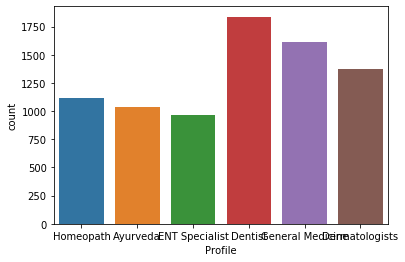

In [10]:
x=doctor_df['Profile']
ax=sns.countplot(x=x,data=doctor_df)

In [11]:
#chi 2 test distplot of fees more croostab

In [12]:
doctor_df.shape

(7948, 7)

In [13]:
#we have a lot of categorical data lets work on it
doctor_df['Qual_1'] = doctor_df['Qualification'].str.split(',').str[0]
doctor_df['Qual_2'] = doctor_df['Qualification'].str.split(',').str[1]
doctor_df['Qual_3'] = doctor_df['Qualification'].str.split(',').str[2]
doctor_df['Qual_1'].fillna("XXX",inplace = True)
doctor_df['Qual_2'].fillna("XXX",inplace = True)
doctor_df['Qual_3'].fillna("XXX",inplace = True)
#filling null values with xxx will treat them later

In [14]:
doctor_df['years_exp'] = doctor_df['Experience'].str.slice(stop=2).astype(int)

In [15]:
#filling null values with zero nd removing the percentage sign
doctor_df['Rating'].fillna('0%',inplace = True)
doctor_df['Rating'] = doctor_df['Rating'].str.slice(stop=-1).astype(int)

In [16]:
#splitting the place into city nd locality
doctor_df['City'] = doctor_df['Place'].str.split(',').str[1]
doctor_df['Locality'] = doctor_df['Place'].str.split(',').str[0]
doctor_df['City'].fillna("XXX",inplace = True)
doctor_df['Locality'].fillna("XXX",inplace = True)

In [17]:
# 3 variables into 3 columns (rating %, followed by the number of people who rated and then the doctor’s address)
doctor_df['Misc'] = doctor_df['Miscellaneous_Info'].str.split('%').str[0]
doctor_df['Misc_len'] = doctor_df['Misc'].str.len()
doctor_df.loc[doctor_df['Misc_len']>3, 'Misc'] = 0
doctor_df['Misc'].fillna(0,inplace = True)
doctor_df['Misc'] = doctor_df['Misc'].astype(int)
doctor_df['Misc_2'] = doctor_df['Miscellaneous_Info'].str.split('% ').str[1]
doctor_df['Misc_3'] = doctor_df['Misc_2'].str.split(' ').str[0]
doctor_df['Misc_3'].fillna(0,inplace = True)
doctor_df['Misc_3_len'] = doctor_df['Misc_3'].str.len()
doctor_df.loc[doctor_df['Misc_3_len']>3, 'Misc_3'] = 0
doctor_df.loc[doctor_df['Misc_3']==',', 'Misc_3'] = 0
doctor_df['Misc_3'] = doctor_df['Misc_3'].astype(int)

In [18]:
doctor_df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Qual_1,Qual_2,Qual_3,years_exp,City,Locality,Misc,Misc_len,Misc_2,Misc_3,Misc_3_len
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100,BHMS,MD - Homeopathy,XXX,24,Ernakulam,Kakkanad,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98,BAMS,MD - Ayurveda Medicine,XXX,12,Bangalore,Whitefield,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,MBBS,MS - Otorhinolaryngology,XXX,9,Bangalore,Mathikere - BEL,0,NaN,NaN,0,NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0,BSc - Zoology,BAMS,XXX,12,Bangalore,Bannerghatta Road,0,58.0,NaN,0,NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100,BAMS,XXX,XXX,20,Chennai,Keelkattalai,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0


In [19]:
df.shape

(5961, 7)

In [20]:
#lets set up our model for predicting results
doctor_df = doctor_df.drop(doctor_df[['Experience','Miscellaneous_Info','Place','Qualification','Misc_len','Misc_3_len']], axis=1)
df_train = doctor_df[0:5961]
df_test = doctor_df[5961:]
df_test = df_test.drop(['Fees'], axis =1)

In [21]:
#lets label encode the categorical data as we now have meaningul data so lets covert into numerical data for predicting results
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
df_test["Qual_1_code"] = lb.fit_transform(df_test["Qual_1"])
df_test["Qual_2_code"] = lb.fit_transform(df_test["Qual_2"])
df_test["Qual_3_code"] = lb.fit_transform(df_test["Qual_3"])
df_test["Profile_code"] = lb.fit_transform(df_test["Profile"])
df_test["City_code"] = lb.fit_transform(df_test["City"])
df_test["Locality_code"] = lb.fit_transform(df_test["Locality"])

In [22]:
#now lets put the label encoded test data to  train data  nd dropping duplicates
df_test_merge_1 = df_test[['Qual_1','Qual_1_code']].drop_duplicates()
df_test_merge_2 = df_test[['Qual_2','Qual_2_code']].drop_duplicates()
df_test_merge_3 = df_test[['Qual_3','Qual_3_code']].drop_duplicates()
df_test_merge_4 = df_test[['Profile','Profile_code']].drop_duplicates()
df_test_merge_5 = df_test[['City','City_code']].drop_duplicates()
df_test_merge_6 = df_test[['Locality','Locality_code']].drop_duplicates()

In [23]:
#putting t=into test data
df_train = pd.merge(df_train,df_test_merge_1[['Qual_1','Qual_1_code']],on='Qual_1', how='left')
df_train = pd.merge(df_train,df_test_merge_2[['Qual_2','Qual_2_code']],on='Qual_2', how='left')
df_train = pd.merge(df_train,df_test_merge_3[['Qual_3','Qual_3_code']],on='Qual_3', how='left')
df_train = pd.merge(df_train,df_test_merge_4[['Profile','Profile_code']],on='Profile', how='left')
df_train = pd.merge(df_train,df_test_merge_5[['City','City_code']],on='City', how='left')
df_train = pd.merge(df_train,df_test_merge_6[['Locality','Locality_code']],on='Locality', how='left')

In [24]:
#filling null values
cols=["Qual_1_code","Qual_2_code","Qual_3_code","Locality_code","City_code"]
df_train[cols]=df_train[cols].fillna(df_train.mean().iloc[0])

In [25]:
df_lg = df_train[['Qual_1_code','Qual_2_code','Qual_3_code','years_exp', 'Rating','Profile_code','Locality_code','City_code','Misc','Misc_3','Fees']]
x = df_lg.drop(['Fees'], axis=1)
y = df_lg.Fees

In [26]:
df_lg.shape

(5961, 11)

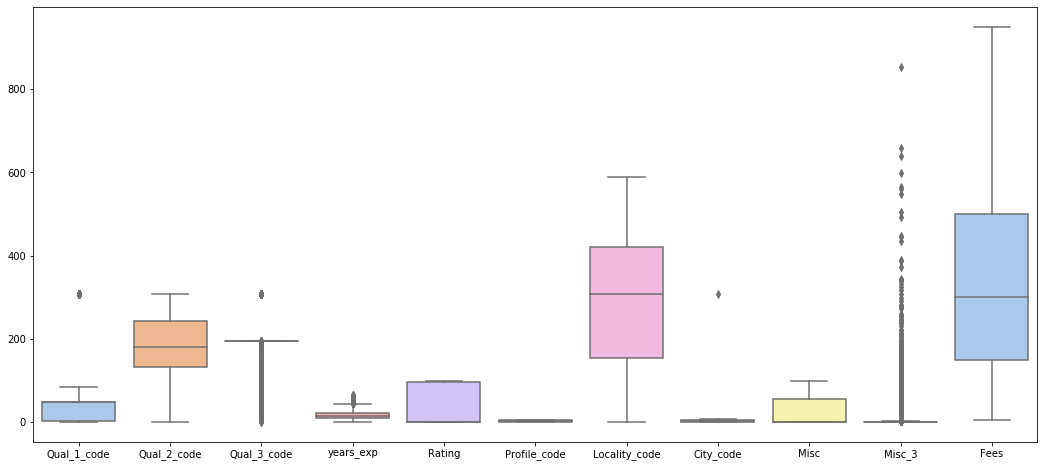

In [27]:
#lets check for outliers,they are present lets fix it
plt.figure(figsize = (18, 8))
sns.boxplot(data=df_lg, palette ='pastel')

In [28]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_lg))
print(z)

[[0.65865649 0.46314224 0.11135329 ... 1.87245804 0.16064054 1.08926083]
 [0.70129487 0.54954439 0.11135329 ... 1.82346852 1.68520387 0.22029544]
 [0.30070702 0.21573178 0.11135329 ... 0.57701777 0.24590969 0.04161581]
 ...
 [0.30070702 0.85757631 0.11135329 ... 1.79897377 0.03359359 1.52985171]
 [0.30070702 0.47548541 0.11135329 ... 0.57701777 0.24590969 1.08926083]
 [0.67997568 0.11753365 0.11135329 ... 0.57701777 0.24590969 0.56543832]]


In [29]:
threshold=3
print(np.where(z>3))

(array([  20,   33,   79,  105,  110,  110,  183,  202,  224,  236,  243,
        246,  255,  262,  263,  275,  293,  293,  314,  325,  357,  372,
        425,  432,  434,  453,  454,  478,  487,  514,  548,  606,  623,
        623,  624,  624,  687,  713,  718,  733,  753,  754,  766,  786,
        798,  820,  829,  837,  838,  853,  874,  877,  901,  905,  910,
        922,  933,  943,  971,  980,  987, 1009, 1013, 1013, 1027, 1036,
       1037, 1062, 1064, 1071, 1077, 1111, 1136, 1160, 1204, 1204, 1229,
       1297, 1314, 1325, 1327, 1350, 1364, 1371, 1397, 1401, 1450, 1455,
       1491, 1492, 1492, 1504, 1544, 1556, 1586, 1593, 1599, 1611, 1625,
       1631, 1635, 1715, 1736, 1755, 1770, 1777, 1817, 1838, 1843, 1860,
       1960, 1966, 1978, 1980, 1981, 2005, 2006, 2018, 2023, 2025, 2028,
       2030, 2035, 2062, 2084, 2093, 2111, 2159, 2165, 2169, 2202, 2230,
       2240, 2252, 2261, 2262, 2265, 2272, 2281, 2285, 2288, 2299, 2301,
       2316, 2343, 2351, 2360, 2391, 2393, 2395, 2

In [30]:
df_lg = df_lg[(z < 3).all(axis=1)]

In [31]:
df_lg.shape

(5578, 11)

In [32]:
df_lg = df_lg.sample(frac=1, random_state=0)

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=123)



In [34]:
lg=LinearRegression()
lg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lg.coef_

array([ 0.2481534 , -0.30800439, -0.08957599, -0.69709036,  0.45949883,
       17.34008499, -0.05718201, -0.17967564,  0.18365819,  0.11011686])

In [36]:
pred=lg.predict(x_test)
print("Predicted fees:",pred)
print("actual fees",y_test)

Predicted fees: [310.98453472 359.67994846 290.87038868 ... 288.04605271 377.26087825
 250.94705482]
actual fees 4302    400.0
1189    400.0
2713    100.0
815     150.0
5153    100.0
        ...  
2354    250.0
5595    300.0
148     150.0
4875    600.0
5563     50.0
Name: Fees, Length: 1312, dtype: float64


In [37]:
print('error')
print('Mean absolute error:',mean_absolute_error(y_test,pred))
print('Mean squared error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error
Mean absolute error: 149.77687753071055
Mean squared error: 149.77687753071055
Root Mean Squared error: 183.89513088307353


In [38]:
scores = cross_val_score(lg, x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [39]:
rmse_scores = np.sqrt(-scores)

In [40]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", rmse_scores.std())

Mean:		  183.02204118350613 
Standard Deviation: 4.744327669520221


In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
tree_reg = DecisionTreeRegressor()
scores = cross_val_score(tree_reg,x,y,
                        scoring="neg_mean_squared_error", cv=10)

In [42]:
tree_reg_scores = np.sqrt(-scores)

In [43]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  183.02204118350613 
Standard Deviation: 7.749338996527034


In [44]:
print("Mean:\t\t ", rmse_scores.mean(), "\nStandard Deviation:", tree_reg_scores.std())

Mean:		  183.02204118350613 
Standard Deviation: 7.749338996527034


In [45]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
forest_scores = cross_val_score(forest_reg,x,y,
                               scoring="neg_mean_squared_error", cv=10)

In [47]:
forest_rmse_scores = np.sqrt(-forest_scores)

In [48]:
print("Mean:\t\t ", forest_rmse_scores.mean(), "\nStandard Deviation:", forest_rmse_scores.std())

Mean:		  181.3962965966542 
Standard Deviation: 6.6639466523823785


In [49]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [50]:
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
grid_search.fit(x,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [51]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=2, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None, n_estimators=30)
forest_reg.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=8, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [53]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [54]:
r2_score(tree_reg.predict(x_train),y_train)

0.9964902748763115

In [55]:
#so far random forest is giving a good accuracy

In [56]:
r2_score(forest_reg.predict(x_train),y_train)

0.766643208369776

In [57]:

r2_score(forest_reg.predict(x_test),y_test)

0.7675108854260568

In [58]:
from sklearn.linear_model import Lasso,Ridge
ls=Lasso()
ls.fit(x_train,y_train)
print(ls.score(x_train,y_train))

0.07916376563575378


In [59]:
from sklearn.model_selection import GridSearchCV
alphavalue={'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid=GridSearchCV(estimator=model,param_grid=alphavalue)
grid.fit(x,y)
print(grid)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)
1
{'alpha': 1}


In [60]:
rd=Ridge(alpha=1)
rd.fit(x,y)
print(rd.coef_)
print(rd.score(x_test,y_test))

[ 0.25995263 -0.31376092 -0.10421804 -0.65111498  0.4678074  17.9284028
 -0.05832907 -0.29629754  0.20114593  0.11583534]
0.1035867899295042


In [61]:
df_xgb = df_train[['Qual_1_code','Qual_2_code','Qual_3_code','years_exp', 'Rating','Profile_code','Locality_code','City_code','Misc','Misc_3','Fees']]
x = df_xgb.drop(['Fees'], axis=1)
y = df_xgb.Fees

In [62]:
!pip install xgboost

import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=x,label=y)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, n_estimators = 10)

xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

[18:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[18:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.


In [64]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 212.904532


In [65]:
#random forest is working best till now with accuracy of 76

In [66]:
from sklearn.externals import joblib
joblib.dump(forest_reg,'forest_regdoctor.obj')
forest_reg_from_joblib=joblib.load('forest_regdoctor.obj')